In [14]:
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw


In [22]:
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw


sm1 = 'OC1=CC=C2C=CC=CC2=N1'
legend = []
smiles = [sm1] * 4
names = ['s1'] * 4
mols_to_draw = []
for smi, name in zip(smiles, names):
    m = Chem.MolFromSmiles(smi)
    AllChem.Compute2DCoords(m)
    mols_to_draw.append(m)
    legend.append(name)
img = Draw.MolsToGridImage(mols_to_draw, molsPerRow=2, legends=legend)
img.save('test.png')

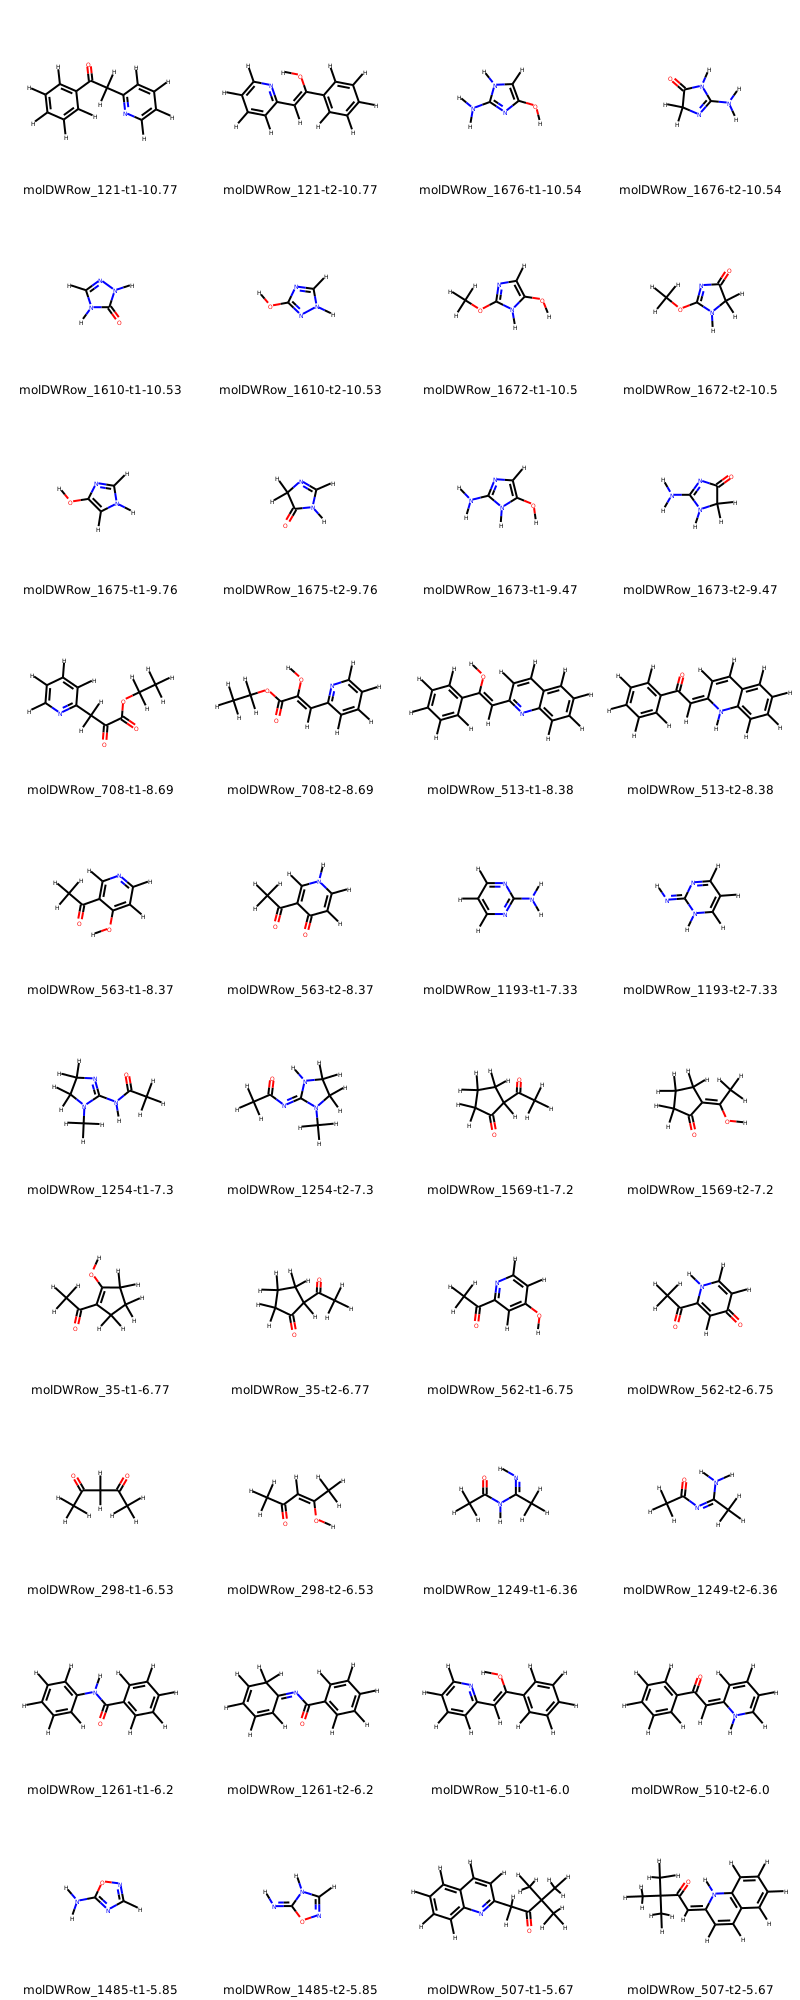

In [47]:
from_worst_to_best = []
names = list(df.names)
for i in reversed(np.argsort(absolute_error)):
    from_worst_to_best.append(i)
from rdkit.Chem import AllChem
mols = []
legends = []
for i in range(0, 20):
    idx = from_worst_to_best[i]
    exp_results = pickle.load(open('../data/exp_results.pickle', 'rb'))
    name = names[idx]
    names_in_all_testsets.append(name)
    t1_smiles = exp_results[name]['t1-smiles']
    t2_smiles = exp_results[name]['t2-smiles']
    m1 = neutromeratio.generate_rdkit_mol(t1_smiles)
    AllChem.Compute2DCoords(m1)
    m2 = neutromeratio.generate_rdkit_mol(t2_smiles)
    AllChem.Compute2DCoords(m2)
    mols.append(m1)
    legends.append(f"{name}-t1-{np.round(absolute_error[idx], 2)}")
    mols.append(m2)
    legends.append(f"{name}-t2-{np.round(absolute_error[idx], 2)}")
from rdkit.Chem import Draw
img=Draw.MolsToGridImage(mols, molsPerRow=4, legends=legends)
img

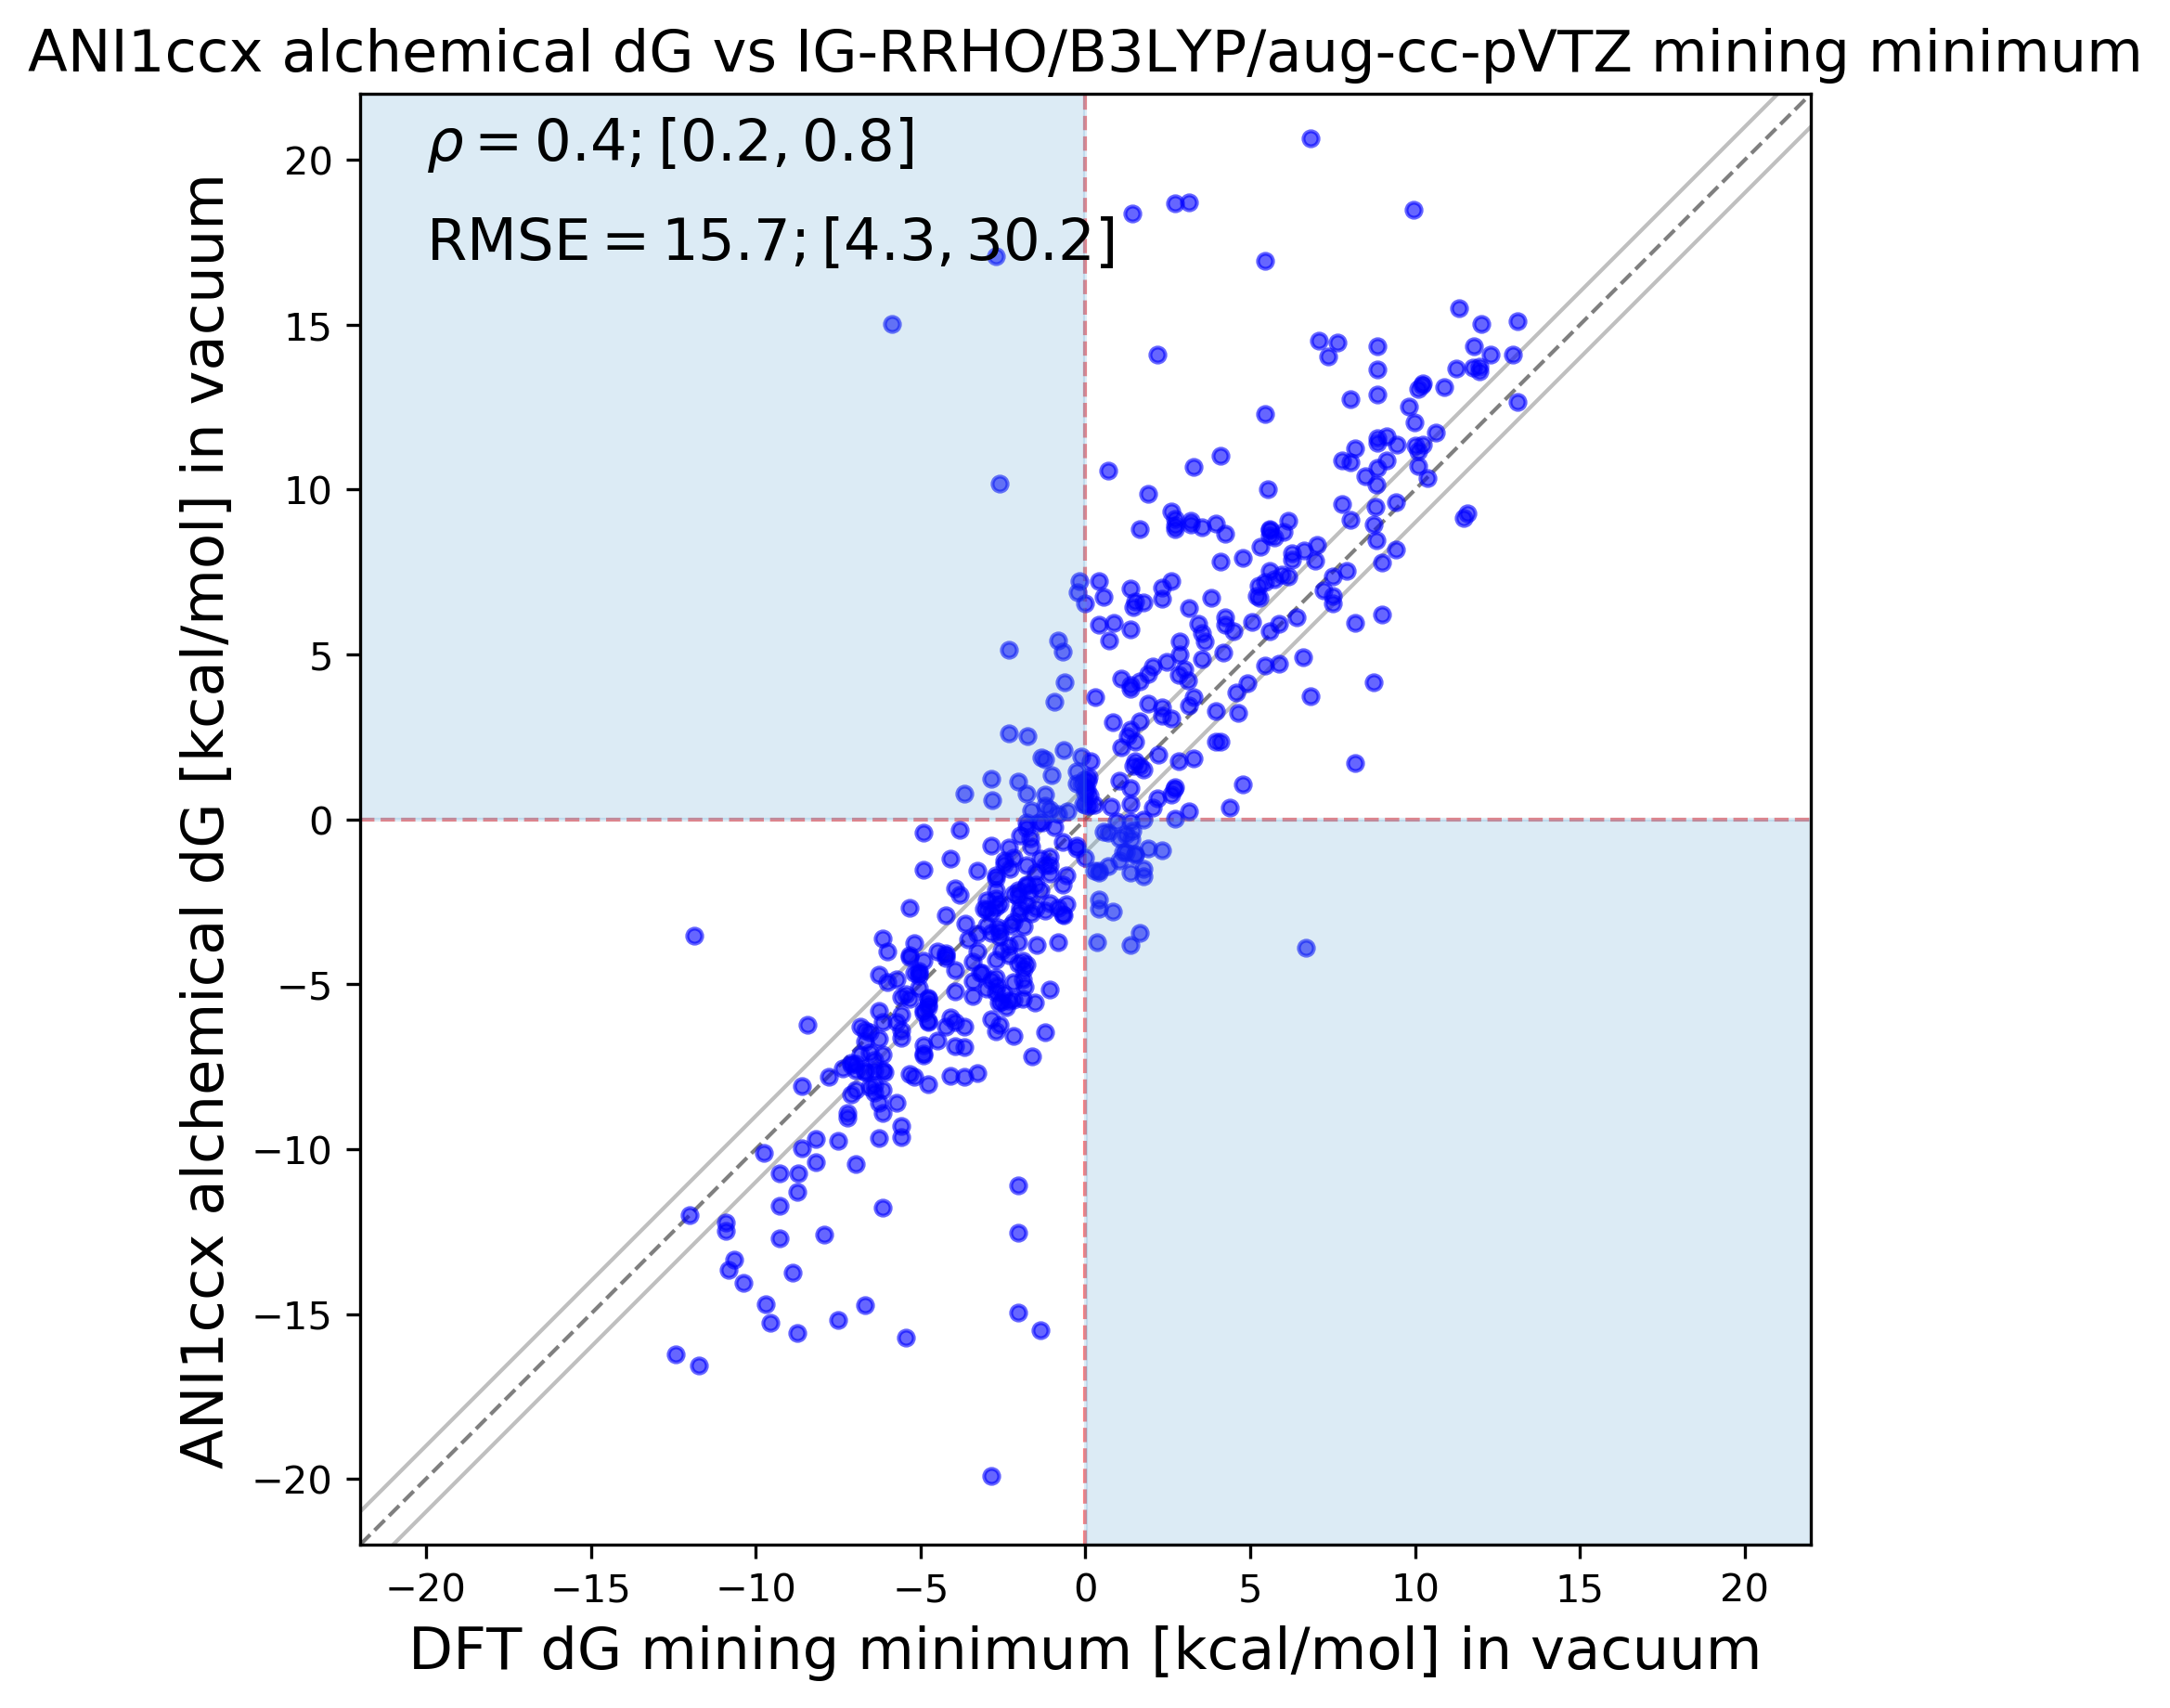

In [49]:
x_list = []
y_list = []

for a in list(results.loc['EXPERIMENT_solv']):
    a = a *kT
    a = a.value_in_unit(unit.kilocalorie_per_mole)
    x_list.append(a)
    
for a in list(results.loc['DFT_solv_mining_minima_dG']):
    a = a *kT
    a = a.value_in_unit(unit.kilocalorie_per_mole)
    y_list.append(a)

absolute_error = []
for i in range(len(x_list)):
    absolute_error.append(abs(y_list[i] - x_list[i]))
    
    
df = pd.DataFrame(list(zip(list(results.columns), x_list, y_list)), columns =['names', 'x', 'y']) 
df = df.dropna(axis=0)

f = plot_correlation_analysis(df, 'ANI1ccx alchemical dG vs IG-RRHO/B3LYP/aug-cc-pVTZ mining minimum', 'ANI1ccx alchemical dG [kcal/mol] in vacuum', 'DFT dG mining minimum [kcal/mol] in vacuum', 'g', 'o')
f.savefig('/home/mwieder/fig.png')

Text(0.5, 0, 'Absolute error in kcal/mol')

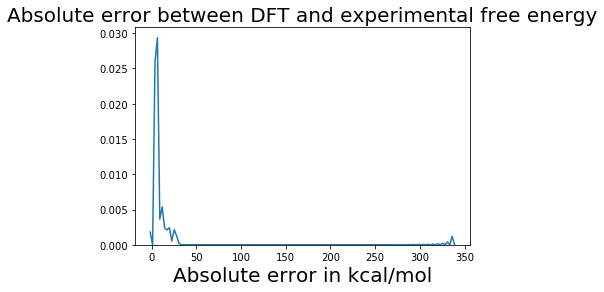

In [52]:
import seaborn as sb

absolute_error = []
x_list = []
y_list = []
for a in list(df.x):
    x_list.append(a)
    
for a in list(df.y):
    y_list.append(a)

absolute_error = []
for i in range(len(x_list)):
    absolute_error.append(abs(y_list[i] - x_list[i]))


sb.kdeplot(absolute_error)
plt.title('Absolute error between DFT and experimental free energy', size=20)
plt.xlabel('Absolute error in kcal/mol', size=20)

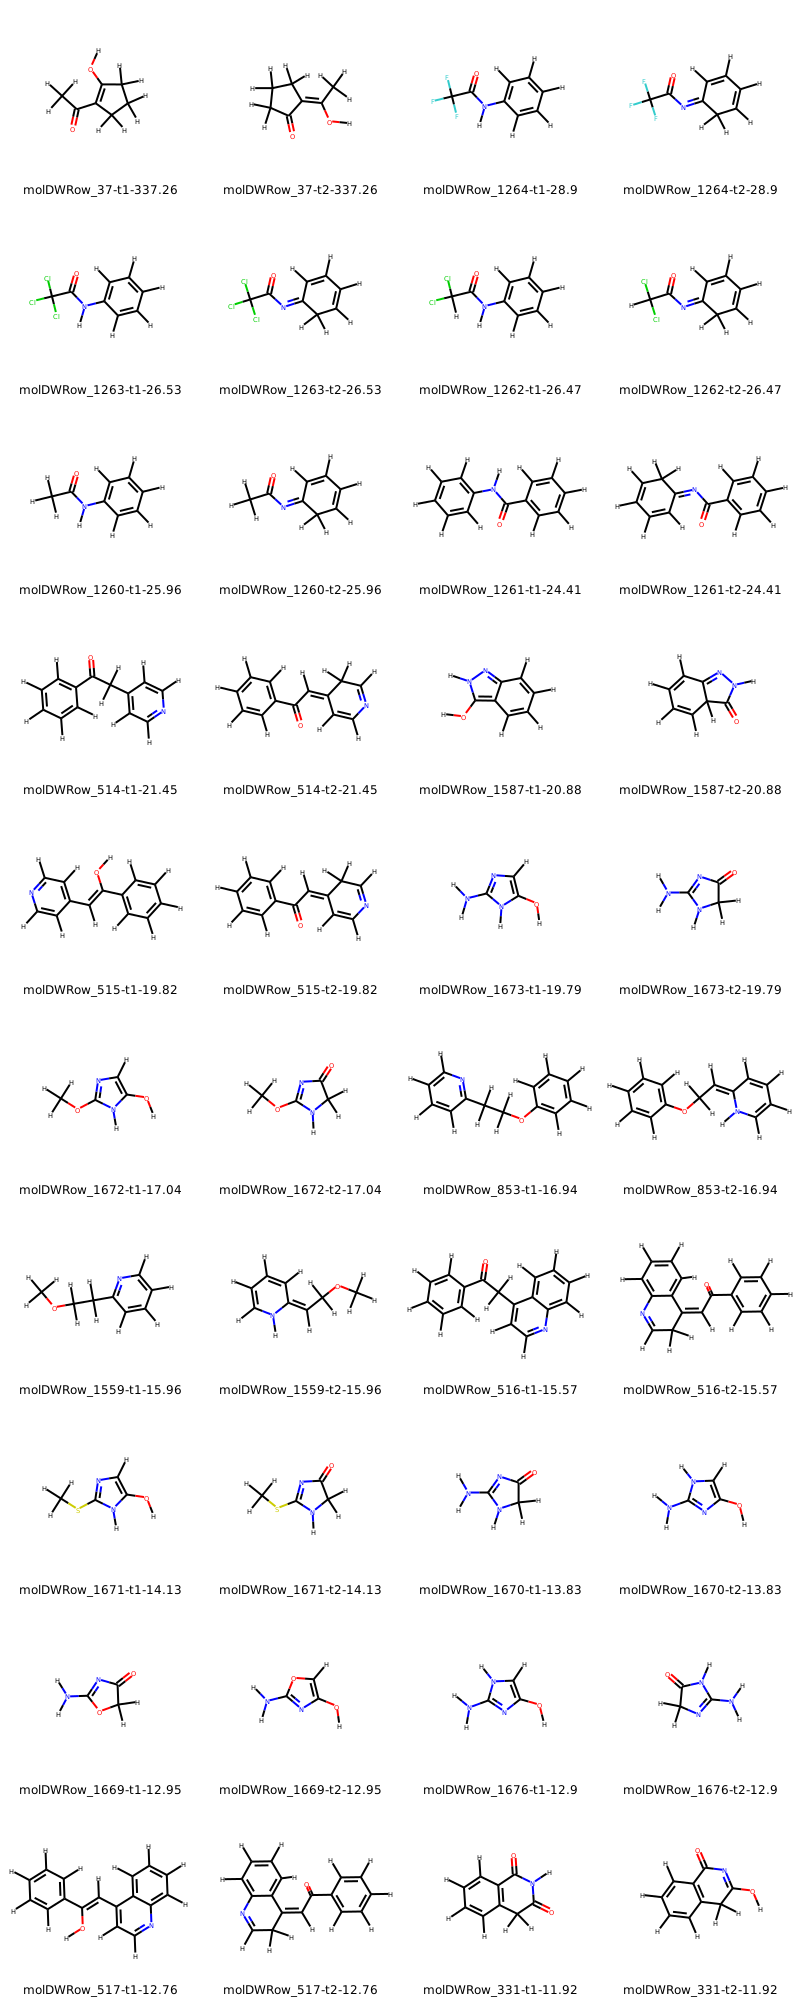

In [51]:
from_worst_to_best = []
names = list(df.names)
for i in reversed(np.argsort(absolute_error)):
    from_worst_to_best.append(i)
from rdkit.Chem import AllChem
mols = []
legends = []
for i in range(0, 20):
    idx = from_worst_to_best[i]
    exp_results = pickle.load(open('../data/exp_results.pickle', 'rb'))
    name = names[idx]
    names_in_all_testsets.append(name)
    t1_smiles = exp_results[name]['t1-smiles']
    t2_smiles = exp_results[name]['t2-smiles']
    m1 = neutromeratio.generate_rdkit_mol(t1_smiles)
    AllChem.Compute2DCoords(m1)
    m2 = neutromeratio.generate_rdkit_mol(t2_smiles)
    AllChem.Compute2DCoords(m2)
    mols.append(m1)
    legends.append(f"{name}-t1-{np.round(absolute_error[idx], 2)}")
    mols.append(m2)
    legends.append(f"{name}-t2-{np.round(absolute_error[idx], 2)}")
from rdkit.Chem import Draw
img=Draw.MolsToGridImage(mols, molsPerRow=4, legends=legends)
img

In [67]:
from collections import Counter
c = Counter(names_in_all_testsets)

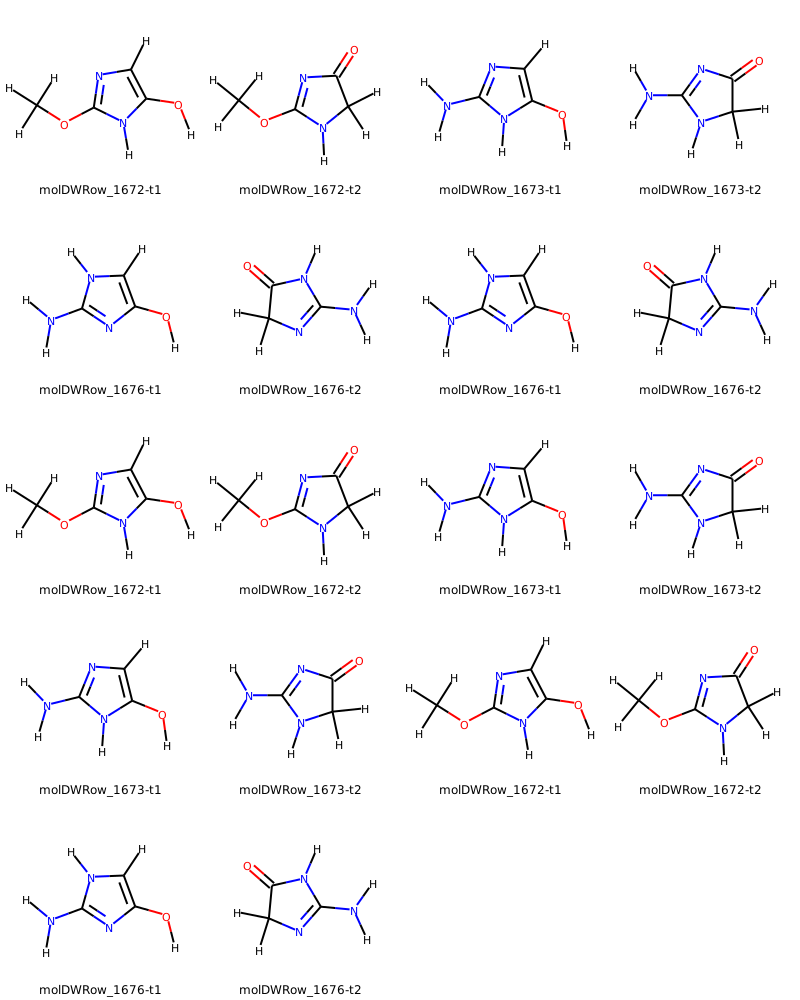

In [72]:
mols = []
legends = []
for name in names_in_all_testsets:
    if c[name] > 2:
        t1_smiles = exp_results[name]['t1-smiles']
        t2_smiles = exp_results[name]['t2-smiles']
        m1 = neutromeratio.generate_rdkit_mol(t1_smiles)
        AllChem.Compute2DCoords(m1)
        m2 = neutromeratio.generate_rdkit_mol(t2_smiles)
        AllChem.Compute2DCoords(m2)
        mols.append(m1)
        legends.append(f"{name}-t1")
        mols.append(m2)
        legends.append(f"{name}-t2")
from rdkit.Chem import Draw
img=Draw.MolsToGridImage(mols, molsPerRow=4, legends=legends)
img

In [59]:
counter['molDWRow_1672']

3

In [ ]:
x_list = []
y_list = []

for a in list(results['experimental_values [kT]']):
    a = a *kT
    a = a.value_in_unit(unit.kilocalorie_per_mole)
    x_list.append(a)
    
for a in list(results['free energy difference in vacuum using the Mining Minima approach with ANI1-ccx [kT]']):
    a = a *kT
    a = a.value_in_unit(unit.kilocalorie_per_mole)
    y_list.append(a)

df = pd.DataFrame(list(zip(list(results.names), x_list, y_list, ['ANI1ccx']*len(results.names))), columns =['names', 'x', 'y', 'method']) 
f = plot_correlation_analysis(df, 'dG vs dE', 'experimental value [kcal/mol]', 'dG mining minima [kcal/mol]', 'g', 'o')


In [ ]:
x_list = []
y_list = []

for a in list(results['free energy difference in vacuum with B3LYP/aug-cc-pVTZ (difference between minimum conformations) [kT]']):
    a = a *kT
    a = a.value_in_unit(unit.kilocalorie_per_mole)
    x_list.append(a)
    
for a in list(results['free energy difference in vacuum using the Mining Minima approach with ANI1-ccx [kT]']):
    a = a *kT
    a = a.value_in_unit(unit.kilocalorie_per_mole)
    y_list.append(a)

df = pd.DataFrame(list(zip(list(results.names), x_list, y_list, ['ANI1ccx']*len(results.names))), columns =['names', 'x', 'y', 'method']) 
f = plot_correlation_analysis(df, 'dG vs dE', 'experimental value [kcal/mol]', 'dG mining minima [kcal/mol]', 'g', 'o')


In [ ]:
results = pickle.load(open('../data/exp_results.pickle', 'rb'))
for name in results:
    print(name)
    print(results[name])
    if results[name]['name'] == 'molDWRowNr107':
        print(name)
        print(results[name])